# House Prices: Advanced Regression Techniques
### [Link to Kaggle Challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Workflow
1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

### Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying:** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating:** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting:** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting:** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating:** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting:** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

# Competition Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# 1. Acquire training and test data

In [112]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import cross_val_score,cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [92]:
df = pd.read_csv('data/train.csv') 
df_train = df[0:1300]
df_test = df[1301:]

df_submission = pd.read_csv('data/test.csv')
combine = [df_train, df_test]

In [93]:
df_train.shape

(1300, 81)

In [94]:
df_test.shape

(159, 81)

In [95]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_submission.shape

(1459, 80)

In [7]:
df_submission.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
df_test.sort_values(by='Id').head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1301,1302,70,RL,NaN,7500,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,177500
1302,1303,60,RL,92.0,10120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,290000
1303,1304,20,RL,73.0,8688,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,232000


### Check for missing values

In [100]:
df_test.isna().sum().sort_values(ascending=False)

PoolQC           157
MiscFeature      156
Alley            145
Fence            128
FireplaceQu       72
                ... 
CentralAir         0
SaleCondition      0
Heating            0
TotalBsmtSF        0
Id                 0
Length: 81, dtype: int64

## Dataset description

In [10]:
f = open("data/data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# 2. Visualization

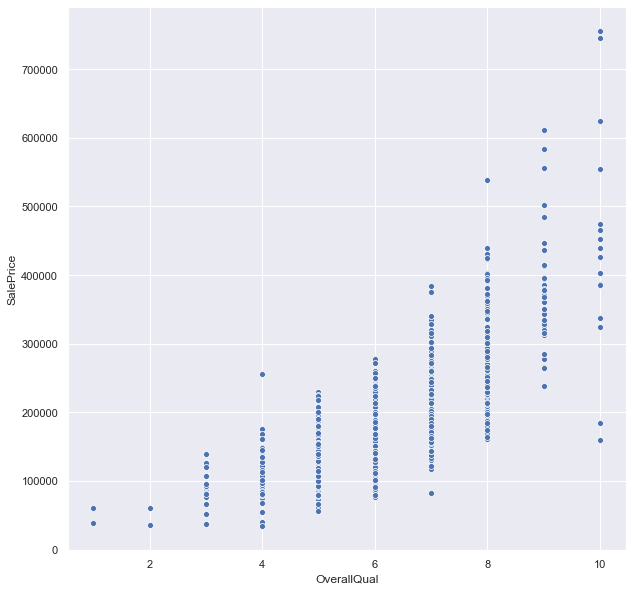

In [147]:
sns.set(rc={'figure.figsize':(10,10)})

sns.scatterplot(x='OverallQual', y='SalePrice', data=df_train)

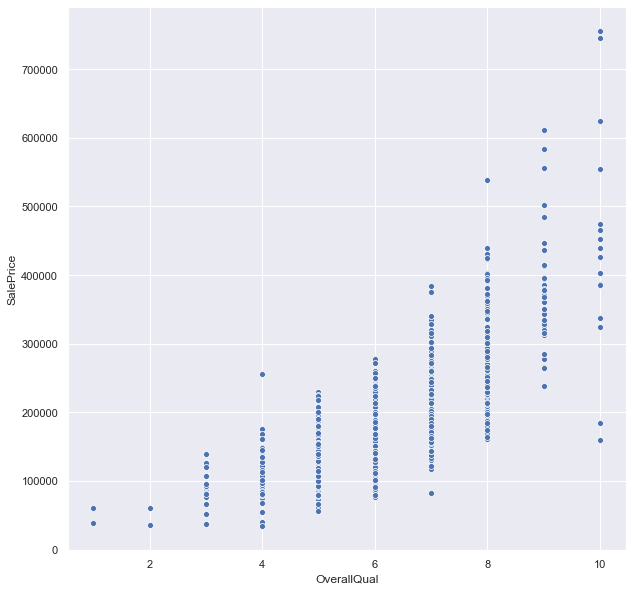

In [146]:
sns.set(rc={'figure.figsize':(10,10)})

sns.scatterplot(x='LotArea', y='SalePrice', data=df_train)

# 3. Feature Engineering

In [12]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1300.000000,1300.000000,1071.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1292.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000
mean,650.500000,57.057692,70.198880,10573.323077,6.102308,5.573846,1971.293846,1984.676923,104.372291,446.273077,...,94.936154,46.063077,21.558462,3.372308,14.972308,2.131538,44.495385,6.316154,2007.81000,180983.514615
std,375.421985,42.466041,24.622546,10388.805901,1.378766,1.118778,29.934696,20.605879,184.002576,460.343454,...,123.622310,65.777829,60.720251,28.830045,54.547428,34.502318,517.388498,2.698196,1.32892,80096.642018
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.00000,34900.000000
25%,325.750000,20.000000,59.000000,7590.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.00000,130000.000000
50%,650.500000,50.000000,70.000000,9476.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.00000,163000.000000
75%,975.250000,70.000000,80.000000,11616.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.00000,213310.000000
max,1300.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.00000,755000.000000


**Function to create ranges for continuous feature**

In [13]:
def create_ranges(max_value, min_value, value):
    #print(value)
    shifted_max_value = max_value + abs(min_value)
    shifted_value = value + abs(min_value)
    #print(type(shifted_max_value))
    #print(type(shifted_value))
    percentage = np.divide(shifted_value, shifted_max_value)
    #print(type(percentage))
    #print(percentage)
    output_range = int(round(percentage*10))
    #print(output_range)

    return output_range

## 3.1 MasVnrArea
MasVnrArea: Masonry veneer area in square feet

In [14]:
df_train.MasVnrArea.isna().sum()

8

**Set all NaN values to mean**

In [15]:
MasVnrArea_mean = df_train.MasVnrArea.mean()
MasVnrArea_mean

104.37229102167183

In [16]:
df_train['MasVnrArea'].fillna(MasVnrArea_mean, inplace=True)
df_test['MasVnrArea'].fillna(MasVnrArea_mean, inplace=True)

/Users/bjornar/miniconda/envs/dsEnv/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
df_train.MasVnrArea.isna().sum()

0

## 3.2 OverallQual: Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [18]:
df_train.OverallQual.value_counts()

5     361
6     331
7     285
8     148
4      99
9      39
10     16
3      16
2       3
1       2
Name: OverallQual, dtype: int64

In [19]:
df_train.OverallQual.isna().sum()

0

In [20]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.OverallQual, prefix='OverallQual')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.OverallQual, prefix='OverallQual')], axis=1)

In [21]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,1,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,1,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,1,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,1,0,0


## 3.3 YearBuilt
Original construction date

In [22]:
def YearBuilt_ranges(year):
    if year <= 1900:
        built_range = 'pre_1900'
    elif year > 1900 and year <= 1925:
        built_range = '1900_1925'
    elif year > 1925 and year <= 1950:
        built_range = '1925_1950'
    elif year > 1950 and year <= 1975:
        built_range = '1950_1975'
    elif year > 1975 and year <= 2000:
        built_range = '1975_2000'
    elif year > 2000:
        built_range = 'post_2000'
        
    return built_range

In [23]:
df_train['YearBuilt_range'] = df_train.apply(lambda x: YearBuilt_ranges(x.YearBuilt), axis=1)
df_test['YearBuilt_range'] = df_test.apply(lambda x: YearBuilt_ranges(x.YearBuilt), axis=1)

In [24]:
df_train[['YearBuilt_range']];

In [25]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.YearBuilt_range, prefix='YearBuilt_range')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.YearBuilt_range, prefix='YearBuilt_range')], axis=1)

In [26]:
df_train['Age'] = df_train.apply(lambda x: 2010 - x.YearBuilt, axis=1)
df_test['Age'] = df_test.apply(lambda x: 2010 - x.YearBuilt, axis=1)

In [27]:
df_train.drop('YearBuilt', axis=1, inplace=True)
df_test.drop('YearBuilt', axis=1, inplace=True)

## 3.4 YearRemodAdd
Remodel date (same as construction date if no remodeling or additions)

In [28]:
df_train.YearRemodAdd.value_counts().head()

1950    155
2006     87
2005     61
2007     60
2004     55
Name: YearRemodAdd, dtype: int64

In [29]:
df_train['YearsSinceRemod'] = df_train.apply(lambda x: 2010 - x.YearRemodAdd, axis=1)
df_test['YearsSinceRemod']  = df_test.apply(lambda x: 2010 - x.YearRemodAdd, axis=1)

In [30]:
df_train.drop('YearRemodAdd', axis=1, inplace=True)
df_test.drop('YearRemodAdd', axis=1, inplace=True)

## 3.5 ExterQual: Evaluates the quality of the material on the exterior 
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [31]:
df_train.ExterQual.value_counts(dropna=False)

TA    813
Gd    428
Ex     47
Fa     12
Name: ExterQual, dtype: int64

In [32]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.ExterQual, prefix='ExterQual')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.ExterQual, prefix='ExterQual')], axis=1)

In [33]:
df_train.drop('ExterQual', axis=1, inplace=True)
df_test.drop('ExterQual', axis=1, inplace=True)

In [34]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YearBuilt_range_1950_1975,YearBuilt_range_1975_2000,YearBuilt_range_post_2000,YearBuilt_range_pre_1900,Age,YearsSinceRemod,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,1,0,7,7,0,0,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,1,0,0,34,34,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,0,9,8,0,0,1,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,95,40,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,1,0,0,10,10,0,0,1,0


## 3.6 Foundation: Type of foundation
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	 Poured Contrete	
       Slab	  Slab
       Stone	 Stone
       Wood	  Wood


In [35]:
df_train.Foundation.value_counts(dropna=False)

PConc     574
CBlock    573
BrkTil    122
Slab       23
Stone       5
Wood        3
Name: Foundation, dtype: int64

In [36]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.Foundation, prefix='Foundation')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.Foundation, prefix='Foundation')], axis=1)

In [37]:
df_train.drop('Foundation', axis=1, inplace=True)
df_test.drop('Foundation', axis=1, inplace=True)

In [38]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,1,0,0,0,1,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,1,0,1,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,0,0,0,1,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,0,0,0,1,0,0,0


## 3.7 BsmtQual: Evaluates the height of the basement
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [39]:
df_train.BsmtQual.value_counts(dropna=False)

TA     576
Gd     552
Ex     107
NaN     35
Fa      30
Name: BsmtQual, dtype: int64

In [40]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.BsmtQual, prefix='BsmtQual')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.BsmtQual, prefix='BsmtQual')], axis=1)

In [41]:
df_train.drop('BsmtQual', axis=1, inplace=True)
df_test.drop('BsmtQual', axis=1, inplace=True)

In [42]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,1,0,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,1,0,0,0,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,0,0,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,0,0,0,0,0,1,0


## 3.8 BsmtCond: Evaluates the general condition of the basement
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [43]:
df_train.BsmtCond.value_counts(dropna=False)

TA     1168
Gd       56
Fa       39
NaN      35
Po        2
Name: BsmtCond, dtype: int64

**Drop as there are a big majority of TA and 37 NaN**

In [44]:
df_train.drop('BsmtCond', axis=1, inplace=True)
df_test.drop('BsmtCond', axis=1, inplace=True)

## 3.9 BsmtFinType1: Rating of basement finished area
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [45]:
df_train.BsmtFinType1.value_counts(dropna=False)

Unf    376
GLQ    372
ALQ    198
BLQ    132
Rec    121
LwQ     66
NaN     35
Name: BsmtFinType1, dtype: int64

In [46]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.BsmtFinType1, prefix='BsmtFinType1')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.BsmtFinType1, prefix='BsmtFinType1')], axis=1)

In [47]:
df_train.drop('BsmtFinType1', axis=1, inplace=True)
df_test.drop('BsmtFinType1', axis=1, inplace=True)

In [48]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,1,0,0,0,1,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,1,0,1,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,0,0,0,1,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,0,0,0,1,0,0,0


## 3.10 BsmtFinSF1: Type 1 finished square feet

In [49]:
df_train.BsmtFinSF1.describe()

count    1300.000000
mean      446.273077
std       460.343454
min         0.000000
25%         0.000000
50%       385.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [50]:
df_train.BsmtFinSF1.isna().sum()

0

In [51]:
df_test.BsmtFinSF1.isna().sum()

0

In [52]:
feature = 'BsmtFinSF1'
max_value = df_train[[feature]].max()[0]
min_value = df_train[[feature]].min()[0]

df_train[feature+'_range'] = df_train.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

**Fill NaN in test set**

In [53]:
df_test.BsmtFinSF1.isna().sum()

0

In [54]:
df_test.BsmtFinSF1.fillna(df_test.BsmtFinSF1.mean(), inplace=True)

In [55]:
feature = 'BsmtFinSF1'
max_value = df_test[[feature]].max()[0]
min_value = df_test[[feature]].min()[0]

df_test[feature+'_range'] = df_test.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

In [56]:
df_train.drop('BsmtFinSF1', axis=1, inplace=True)
df_test.drop('BsmtFinSF1', axis=1, inplace=True)

In [57]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinSF1_range
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,1,0,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,1,0,1,0,0,0,0,0,2
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,1,0,0,0,1,0,0,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,1,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,1,0,0,0,1,0,0,0,1


## 3.11 HeatingQC: Heating quality and condition
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

In [58]:
df_train.HeatingQC.value_counts(dropna=False)

Ex    651
TA    390
Gd    217
Fa     41
Po      1
Name: HeatingQC, dtype: int64

In [59]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.HeatingQC, prefix='HeatingQC')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.HeatingQC, prefix='HeatingQC')], axis=1)

In [60]:
df_train.drop('HeatingQC', axis=1, inplace=True)
df_test.drop('HeatingQC', axis=1, inplace=True)

## 3.12 1stFlrSF: First Floor square feet

In [61]:
df_train.rename({'1stFlrSF':'FirstFlrSF'}, axis=1, inplace=True)
df_test.rename({'1stFlrSF':'FirstFlrSF'}, axis=1, inplace=True)

In [62]:
df_train[['FirstFlrSF']].isna().sum()

FirstFlrSF    0
dtype: int64

In [63]:
#df_train[['FirstFlrSF']].plot()

**Remove outliers**

In [64]:
FirststFlrSF_mean = df_train[['FirstFlrSF']].mean()[0]
FirststFlrSF_mean

1161.3076923076924

In [65]:
df_train['FirstFlrSF'] = df_train.apply(lambda x: FirststFlrSF_mean if x.FirstFlrSF > 4000 else x.FirstFlrSF, axis=1)
df_test['FirstFlrSF'] = df_test.apply(lambda x: FirststFlrSF_mean if x.FirstFlrSF > 4000 else x.FirstFlrSF, axis=1)

**Create and implement ranges**

In [66]:
feature = 'FirstFlrSF'
max_value = df_train[[feature]].max()[0]
min_value = df_train[[feature]].min()[0]

df_train[feature+'_range'] = df_train.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

In [67]:
feature = 'FirstFlrSF'
max_value = df_test[[feature]].max()[0]
min_value = df_test[[feature]].min()[0]

df_test[feature+'_range'] = df_test.apply(lambda x: create_ranges(max_value, min_value, x[[feature]][0]), axis=1)

In [68]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinSF1_range,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,FirstFlrSF_range
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,1,1,0,0,0,0,3
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,2,1,0,0,0,0,4
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,1,0,0,0,0,4
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,1,0,0,4
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,1,0,0,0,0,4


In [69]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.FirstFlrSF, prefix='FirstFlrSF')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.FirstFlrSF, prefix='FirstFlrSF')], axis=1)

In [70]:
df_train.drop('FirstFlrSF', axis=1, inplace=True)
df_test.drop('FirstFlrSF', axis=1, inplace=True)

In [71]:
#df_train.drop('FirstFlrSF_range', axis=1, inplace=True)
#df_test.drop('FirstFlrSF_range', axis=1, inplace=True)

# 4. Analysis

## 4.1 Correlation Matrix

In [72]:
cols = df_train.columns.tolist()
n = int(cols.index('SalePrice'))
cols =  cols[:n] + cols[n+1:] + [cols[n]]
df_train = df_train[cols]

In [73]:
corr_mat = df_train.corr()

In [74]:
abs(corr_mat['SalePrice'].sort_values())

ExterQual_TA       0.587273
Age                0.521406
YearsSinceRemod    0.512167
BsmtQual_TA        0.444781
OverallQual_5      0.370525
                     ...   
GarageArea         0.620809
GarageCars         0.641674
GrLivArea          0.710247
OverallQual        0.787937
SalePrice          1.000000
Name: SalePrice, Length: 791, dtype: float64

In [75]:
corr_mat.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'FirstFlrSF_2392.0', 'FirstFlrSF_2402.0', 'FirstFlrSF_2411.0',
       'FirstFlrSF_2444.0', 'FirstFlrSF_2515.0', 'FirstFlrSF_2524.0',
       'FirstFlrSF_2898.0', 'FirstFlrSF_3138.0', 'FirstFlrSF_3228.0',
       'SalePrice'],
      dtype='object', length=791)

In [76]:
corr_mat[corr_mat['SalePrice'].abs().sort_values(ascending=False) > 0.4]

/Users/bjornar/miniconda/envs/dsEnv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,FirstFlrSF_2392.0,FirstFlrSF_2402.0,FirstFlrSF_2411.0,FirstFlrSF_2444.0,FirstFlrSF_2515.0,FirstFlrSF_2524.0,FirstFlrSF_2898.0,FirstFlrSF_3138.0,FirstFlrSF_3228.0,SalePrice
OverallQual,-0.030397,0.041105,0.254442,0.105749,1.000000,-0.083504,0.405366,-0.057728,0.308401,0.528797,...,0.078466,0.078466,0.078466,0.078466,-2.059588e-03,0.038203,0.038203,0.078466,0.038203,0.787937
MasVnrArea,-0.054613,0.026127,0.196196,0.106685,0.405366,-0.122055,1.000000,-0.066226,0.098965,0.349358,...,0.123719,0.014470,-0.015793,0.161245,-8.233740e-18,-0.015793,-0.015793,0.099509,-0.015793,0.472220
TotalBsmtSF,-0.014678,-0.226792,0.401938,0.265758,0.528797,-0.167554,0.349358,0.110711,0.408127,1.000000,...,0.083618,0.127627,0.083869,0.086878,6.123792e-02,0.091894,0.031773,0.130385,0.134272,0.603631
GrLivArea,-0.001507,0.077464,0.422146,0.263298,0.596158,-0.087842,0.392235,-0.011530,0.234044,0.461840,...,0.046488,0.047016,0.156577,0.148125,5.298515e-02,0.053461,0.073218,0.167142,0.090650,0.710247
FullBath,-0.012705,0.134007,0.200521,0.125196,0.549059,-0.191565,0.275994,-0.073604,0.293320,0.320016,...,0.022090,0.022090,0.072207,0.072207,7.220720e-02,0.022090,0.022090,0.072207,0.072207,0.559997
TotRmsAbvGrd,0.022504,0.044349,0.362012,0.185592,0.433152,-0.067508,0.287074,-0.048276,0.247028,0.289111,...,0.025545,0.059763,0.059763,0.059763,4.265375e-02,0.042654,0.059763,0.076872,0.059763,0.540520
Fireplaces,-0.035659,-0.033887,0.272840,0.272378,0.389852,-0.033619,0.249761,0.048431,0.046148,0.332974,...,0.016830,0.059901,0.059901,0.059901,5.990055e-02,0.016830,0.016830,0.016830,0.016830,0.456773
GarageYrBlt,-0.011935,0.078275,0.065611,-0.028422,0.549282,-0.314524,0.250415,-0.076676,0.196875,0.325552,...,0.028682,0.034496,0.020542,0.018217,-3.876694e-03,0.003100,-0.002714,0.033334,0.015891,0.490586
GarageCars,0.002187,-0.045701,0.297473,0.153588,0.608026,-0.181642,0.360691,-0.025140,0.195436,0.429923,...,0.046529,0.046529,0.046529,0.046529,9.028969e-03,0.009029,0.009029,0.046529,0.009029,0.641674
GarageArea,0.015564,-0.104091,0.353565,0.177623,0.561831,-0.147562,0.365592,-0.006422,0.167079,0.488202,...,0.064715,0.026090,0.044489,0.046968,1.557550e-03,0.009126,0.025176,0.053754,0.009648,0.620809


## Find columns where correlation is > 0.5

In [77]:
correlated_cols = list(corr_mat[corr_mat.SalePrice.abs()>0.4].index)
#correlated_cols.append('Id')
correlated_cols

['OverallQual',
 'MasVnrArea',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'OverallQual_8',
 'OverallQual_9',
 'YearBuilt_range_post_2000',
 'Age',
 'YearsSinceRemod',
 'ExterQual_Ex',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_PConc',
 'BsmtQual_Ex',
 'BsmtQual_TA',
 'BsmtFinType1_GLQ',
 'HeatingQC_Ex',
 'FirstFlrSF_range',
 'SalePrice']

In [78]:
corr_mat[correlated_cols].loc[correlated_cols];

In [79]:
corr_mat[correlated_cols].loc[correlated_cols].reset_index()

,index,OverallQual,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,...,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_PConc,BsmtQual_Ex,BsmtQual_TA,BsmtFinType1_GLQ,HeatingQC_Ex,FirstFlrSF_range,SalePrice
0,OverallQual,1.000000,0.405366,0.528797,0.596158,0.549059,0.433152,0.389852,0.549282,0.608026,...,0.389256,0.545393,-0.647092,0.572407,0.471250,-0.488669,0.433377,0.458109,0.442852,0.787937
1,MasVnrArea,0.405366,1.000000,0.349358,0.392235,0.275994,0.287074,0.249761,0.250415,0.360691,...,0.354238,0.127248,-0.249307,0.184923,0.343421,-0.181308,0.221090,0.167772,0.315840,0.472220
2,TotalBsmtSF,0.528797,0.349358,1.000000,0.461840,0.320016,0.289111,0.332974,0.325552,0.429923,...,0.352195,0.264471,-0.376566,0.299854,0.400108,-0.197253,0.322812,0.275634,0.736036,0.603631
3,GrLivArea,0.596158,0.392235,0.461840,1.000000,0.627488,0.825900,0.460673,0.240385,0.469808,...,0.282502,0.307904,-0.396780,0.301087,0.320180,-0.277656,0.197853,0.263075,0.517623,0.710247
4,FullBath,0.549059,0.275994,0.320016,0.627488,1.000000,0.559026,0.230979,0.489142,0.467689,...,0.191413,0.430644,-0.475537,0.470089,0.238437,-0.495416,0.264285,0.341644,0.368181,0.559997
5,TotRmsAbvGrd,0.433152,0.287074,0.289111,0.825900,0.559026,1.000000,0.328777,0.158929,0.360084,...,0.244378,0.179703,-0.259820,0.204441,0.249839,-0.157542,0.077059,0.182137,0.389863,0.540520
6,Fireplaces,0.389852,0.249761,0.332974,0.460673,0.230979,0.328777,1.000000,0.051261,0.306141,...,0.162260,0.153092,-0.198112,0.104126,0.177321,-0.139221,0.119858,0.141836,0.376527,0.456773
7,GarageYrBlt,0.549282,0.250415,0.325552,0.240385,0.489142,0.158929,0.051261,1.000000,0.586218,...,0.212358,0.537916,-0.603279,0.653266,0.324515,-0.595171,0.450080,0.463443,0.228875,0.490586
8,GarageCars,0.608026,0.360691,0.429923,0.469808,0.467689,0.360084,0.306141,0.586218,1.000000,...,0.252389,0.422675,-0.485992,0.450571,0.366046,-0.448557,0.327954,0.336317,0.427426,0.641674
9,GarageArea,0.561831,0.365592,0.488202,0.465791,0.395278,0.329776,0.268976,0.560766,0.881257,...,0.285373,0.363802,-0.446688,0.380450,0.375753,-0.355329,0.312988,0.305089,0.452496,0.620809


In [80]:
corr_mat_plot = pd.merge(corr_mat[correlated_cols].loc[correlated_cols].reset_index(), corr_mat['SalePrice'][correlated_cols].reset_index(), on='index').set_index('index')



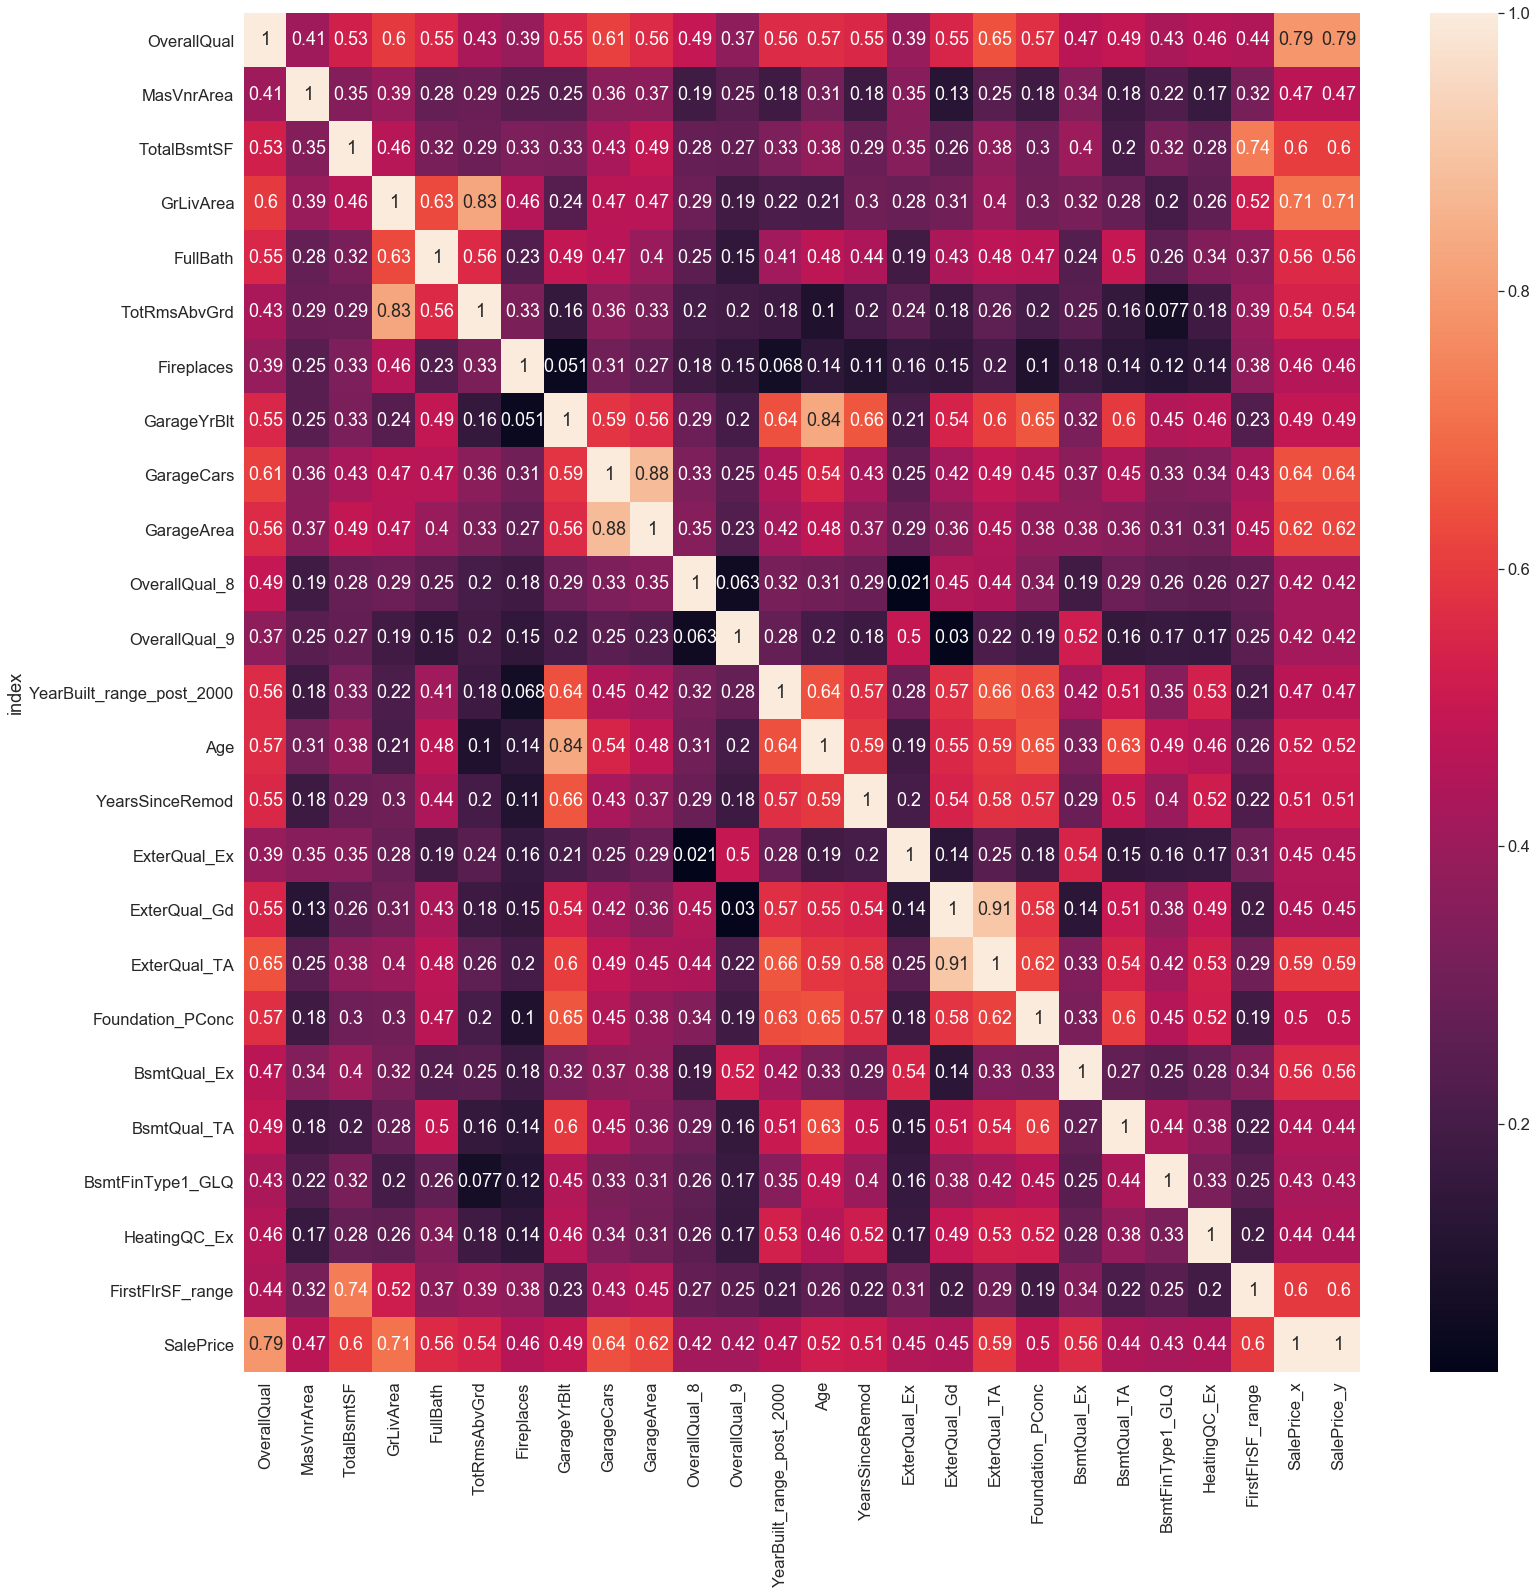

In [81]:
sns.set(rc={'figure.figsize':(25,25)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

ax = sns.heatmap(abs(corr_mat_plot), annot=True)
ax.figure.savefig('correlation_matrix.png')


# 5. Prediction

## Random Forest

In [82]:
X_train = df_train.copy().interpolate(method='ffill')[correlated_cols].drop("SalePrice", axis=1)
Y_train = df_train["SalePrice"]
correlated_cols.remove('SalePrice')
X_test  = df_test.copy()[correlated_cols].interpolate()
Y_test  = df_test.copy()["SalePrice"]
X_train.shape, Y_train.shape, X_test.shape

((1300, 24), (1300,), (159, 24))

### Train model

In [83]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

### Predict

In [ ]:
Y_pred = random_forest.predict(X_test)

### Check predictions

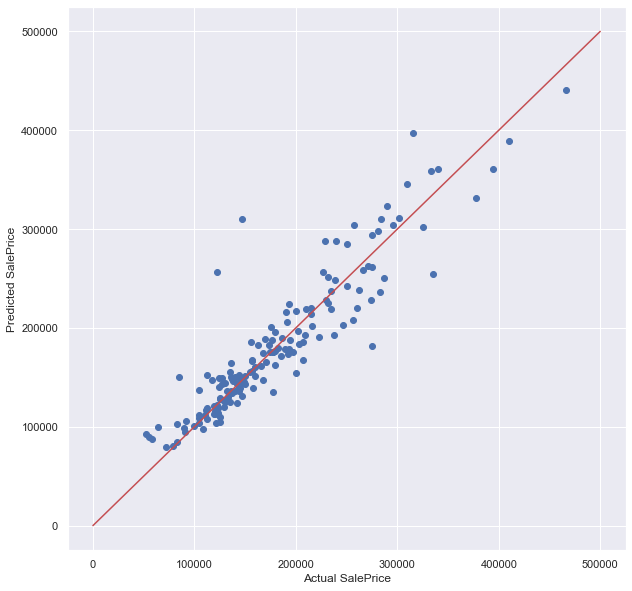

In [140]:
sns.set(rc={'figure.figsize':(10,10)})

plt.scatter(Y_test, Y_pred)

plt.plot([0,500000], [0, 500000], 'r')

plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')

plt.savefig('prediction_vs_actual_plot.png')


## Error - MAE & RMSE

In [143]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.log(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

Mean Absolute Error: 19104.261551362684
Root Mean Squared Error: 10.28843444302203


### Visualize single tree

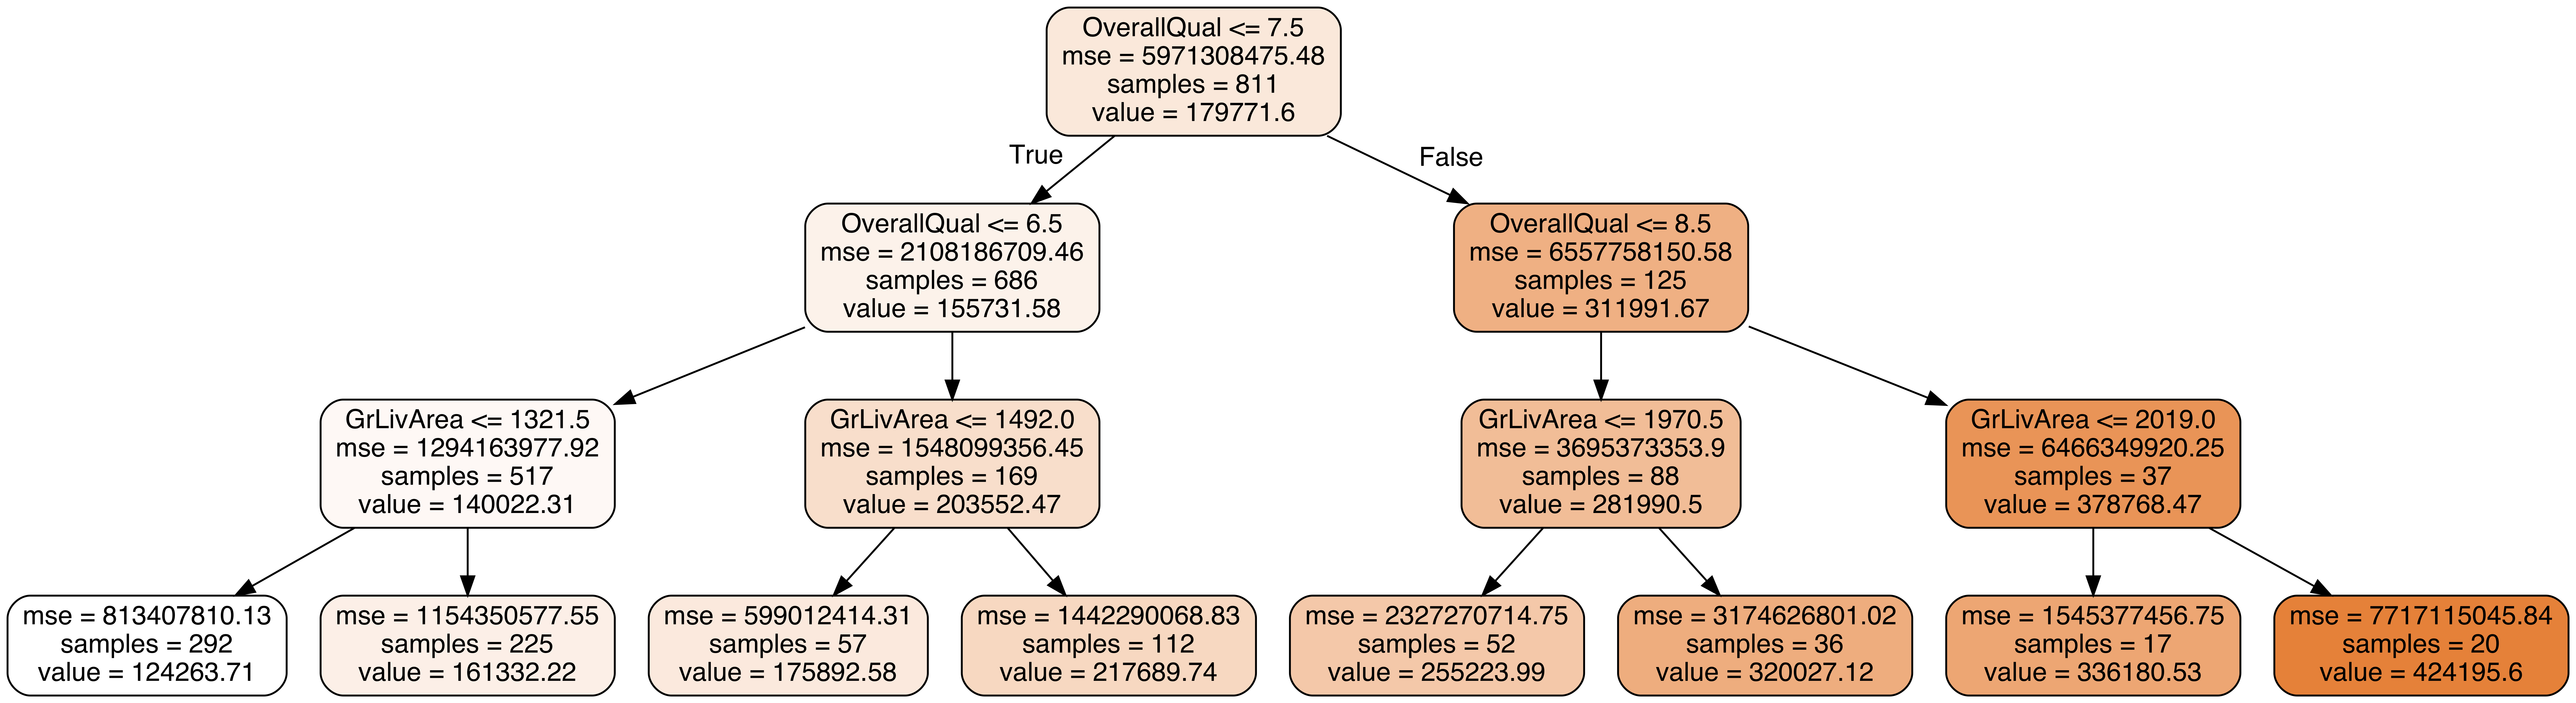

In [84]:
random_forest_visualize = RandomForestRegressor(n_estimators=100, max_depth=3)
random_forest_visualize.fit(X_train, Y_train)

estimator = random_forest_visualize.estimators_[3]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# 6. Submit results

In [88]:
submission = pd.DataFrame({ "Id": df_test["Id"], "SalePrice": Y_pred
                          }).set_index('Id')

In [89]:
submission.to_csv('submission.csv')